Name: Jay Goyal

Experiment: 9

Roll No: C017

Btech EXTC

Third Year

Semester 6

Stock Market Prediction using LSTM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
#Loading the dataset
dataset_train = pd.read_csv("/content/NSE-TATAGLOBAL.csv")

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
dataset_train.shape

(2035, 8)

In [ ]:
#choose column open for model
training_set = dataset_train.iloc[:,1:2]


In [ ]:
training_set.head()

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55


In [ ]:
#Convertthe dataframe into an numpy array
training_set = training_set.values

In [ ]:
training_set.shape

(2035, 1)

In [ ]:
training_set[0:2]

array([[234.05],
       [234.55]])

In [ ]:
#normalize these values
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range= (0,1))
training_set_scaled = scale.fit_transform(training_set)


In [ ]:
training_set_scaled[0:2]

array([[0.6202352 ],
       [0.62226277]])

In [ ]:
training_set_scaled.shape

(2035, 1)

In [ ]:
#Converting the training data into timestamps
x_train = []
y_train = []
#create data in 60 timestamps
for i in range(60,2035):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)                                  

In [ ]:
x_train.shape

(1975, 60)

In [ ]:
y_train.shape

(1975,)

In [ ]:
#convert the timestampsto 3D array for giving the input to LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1975, 60, 1)

In [ ]:
from keras.models  import Sequential
from keras.layers import Dense,LSTM, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units = 50, return_sequences= True))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units = 50, return_sequences= True))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))


In [ ]:
#compile the model
model.compile(optimizer = 'adam', loss='mean_squared_error')    #we have real value so we use mean square error

In [ ]:
#fit the training data
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
62/62 [==============================] - 4s 26ms/step - loss: 0.0360
Epoch 2/10
62/62 [==============================] - 2s 28ms/step - loss: 0.0023
Epoch 3/10
62/62 [==============================] - 2s 28ms/step - loss: 0.0017
Epoch 4/10
62/62 [==============================] - 2s 28ms/step - loss: 0.0015
Epoch 5/10
62/62 [==============================] - 2s 27ms/step - loss: 0.0015
Epoch 6/10
62/62 [==============================] - 2s 28ms/step - loss: 0.0015
Epoch 7/10
62/62 [==============================] - 2s 28ms/step - loss: 0.0013
Epoch 8/10
62/62 [==============================] - 2s 28ms/step - loss: 0.0012
Epoch 9/10
62/62 [==============================] - 2s 28ms/step - loss: 0.0012
Epoch 10/10
62/62 [==============================] - 2s 28ms/step - loss: 0.0011


In [ ]:
#prediction
dataset_test = pd.read_csv("/content/tatatest.csv")

In [ ]:
dataset_test.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,24-10-2018,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,23-10-2018,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,22-10-2018,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,19-10-2018,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,17-10-2018,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [ ]:
real_stock_price = dataset_test.iloc[:,1:2].values


In [ ]:
real_stock_price.shape

(16, 1)

In [ ]:
real_stock_price[0]

array([220.1])

In [ ]:
#concatenate train and test samples
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [ ]:
dataset_total.shape

(2051,)

In [ ]:
inputs = dataset_total[len(dataset_train)-60:].values

In [ ]:
inputs.shape

(76,)

In [ ]:
inputs = inputs.reshape(-1,1)

In [ ]:
inputs.shape

(76, 1)

In [ ]:
inputs = scale.transform(inputs)


In [ ]:
x_test = []
for i in range(60,76):
  x_test.append(inputs[i-60:i,0])
x_test =np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))



In [ ]:
x_test.shape

(16, 60, 1)

In [ ]:
predicted_stock_price = model.predict(x_test)

In [ ]:
predicted_stock_price.shape

(16, 1)

In [ ]:
#unnnormalise
predicted_stock_price = scale.inverse_transform(predicted_stock_price)

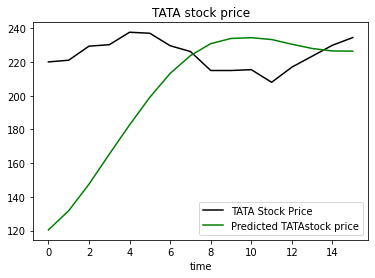

In [ ]:
#plot test and predict
plt.plot(real_stock_price, color = 'black', label ='TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label ='Predicted TATAstock price')
plt.title('TATA stock price')
plt.xlabel('stock price')
plt.xlabel('time')
plt.legend()